# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # os gráficos que usam sns.lineplot apresentavam warnings que só poluiam o código

Carregando o dataset e filtrando outliers

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips = tips[tips['tip_pct'] < .5] # filtro de outliers

Criação do modelo e plotagem  dos resíduos

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.31e-12
Time:                        14:20:19   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.0

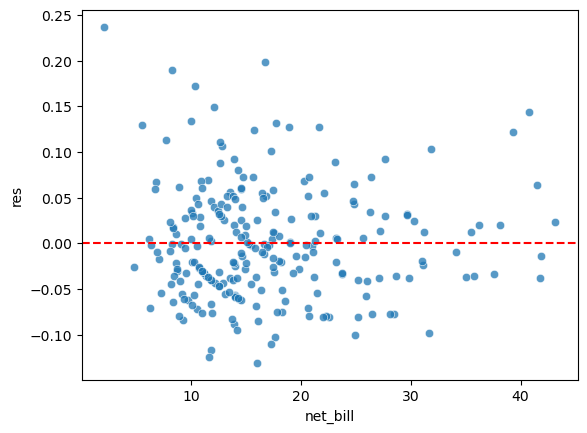

In [3]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Dados e linha de regressão do modelo

(0.0, 0.505398619388979)

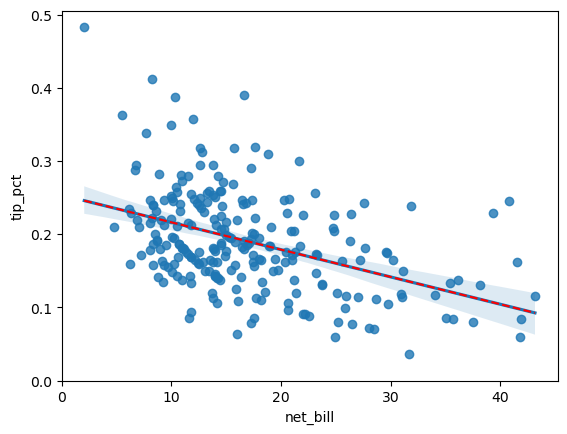

In [4]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
sns.lineplot(x=tips['net_bill'], y=reg.fittedvalues, linestyle='--', color='red')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.03e-14
Time:                        14:20:20   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023  

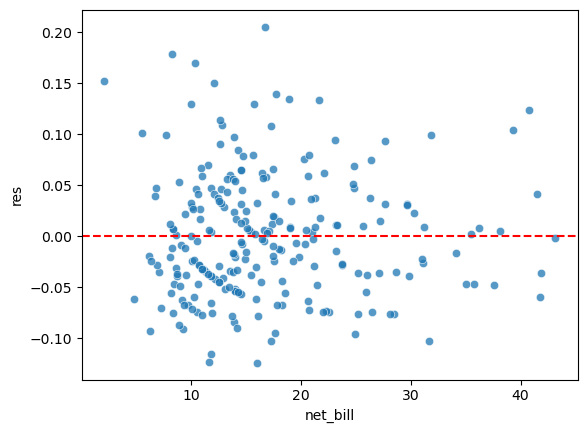

In [5]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

(0.0, 0.505398619388979)

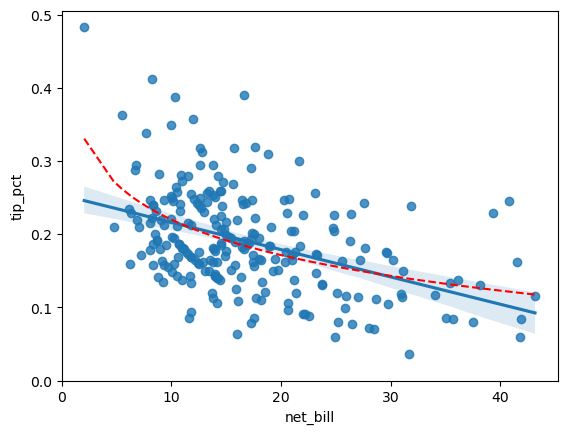

In [6]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
sns.lineplot(x=tips['net_bill'], y=reg.fittedvalues, linestyle='--', color='red')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.09e-12
Time:                        14:20:21   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

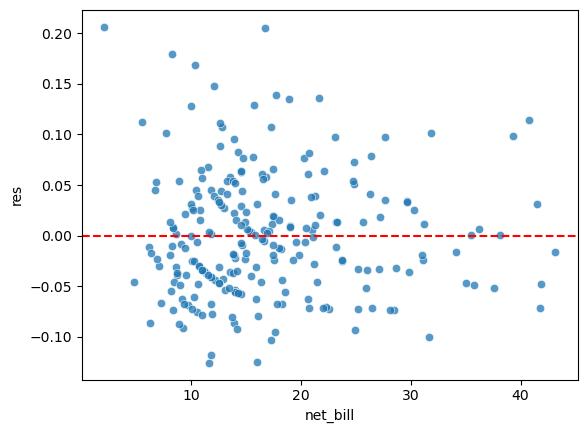

In [7]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

(0.0, 0.505398619388979)

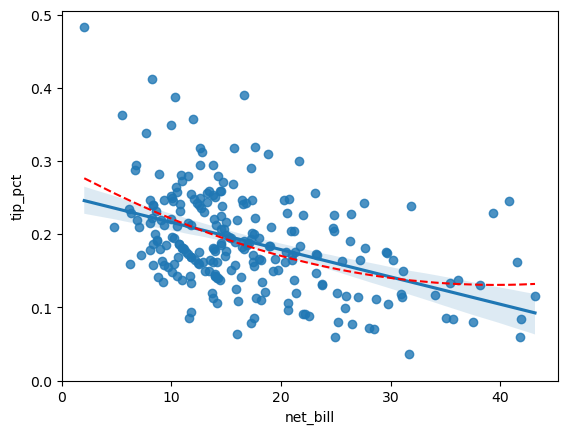

In [8]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
sns.lineplot(x=tips['net_bill'], y=reg.fittedvalues, linestyle='--', color='red')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           5.70e-15
Time:                        14:20:21   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

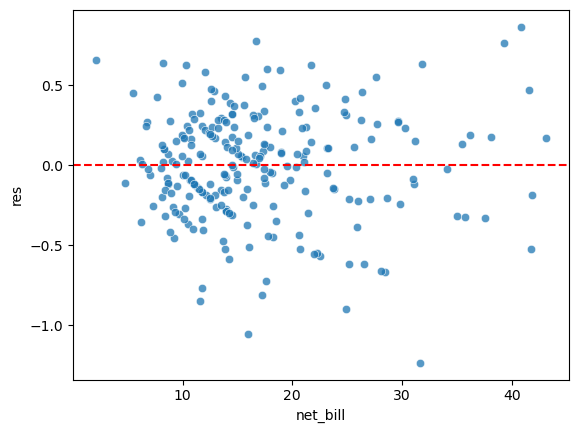

In [9]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [10]:
tips['tip_pct_pred'] = np.exp(reg.fittedvalues)

tips[['tip_pct', 'tip_pct_pred']].corr().iloc[0,1]**2

0.2005148401618375

(0.0, 0.505398619388979)

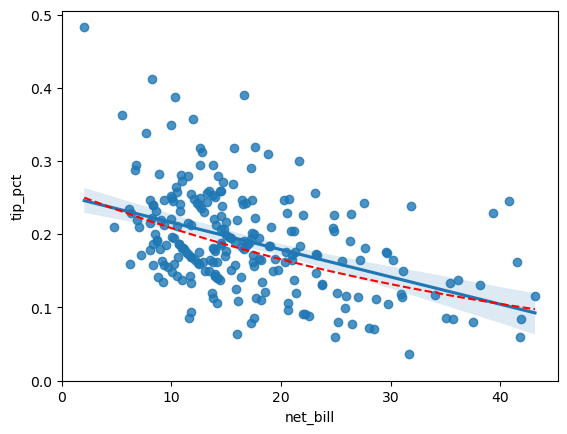

In [11]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
sns.lineplot(x=tips['net_bill'], y=tips['tip_pct_pred'], linestyle='--', color='red')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           2.65e-15
Time:                        14:20:22   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131  

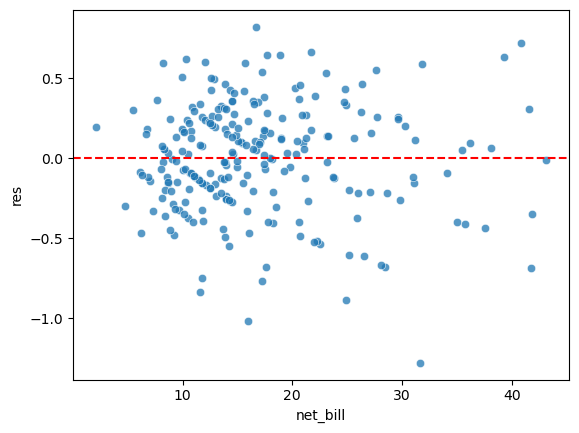

In [12]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [13]:
tips['tip_pct_pred'] = np.exp(reg.fittedvalues)

tips[['tip_pct', 'tip_pct_pred']].corr().iloc[0,1]**2

0.229143365170227

(0.0, 0.505398619388979)

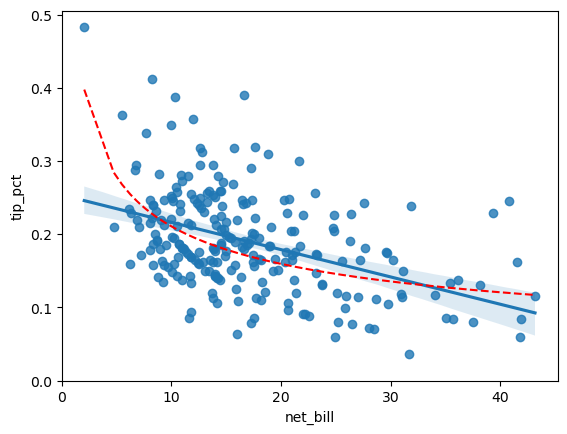

In [14]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
sns.lineplot(x=tips['net_bill'], y=tips['tip_pct_pred'], linestyle='--', color='red')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

###  6. qual modelo resultou no melhor ajuste?

O modelo de melhor ajuste foi o do item 5, aplicando *np.log* tanto na variável explicativa quanto no alvo, apresentando valor de R-quadrado de 0.230